# ML Decision Boundary

- This notebook will demonstrate how to visualize the decision boundary for any given Machine Learning classifier model
- The purpose of this notebook is to explore and come up with an implementation of the above
- This will further be used during the development of the web application

## 1. Importing Libraries

In [1]:
import os

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import (
    AdaBoostClassifier,
    RandomForestClassifier
)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

## 2. Getting the Data

- This exercise will only work with classification datasets
- We will work with continous numeric features for better visualizations
- For convenience sake, we will work only with 2 features (visualizing higher dimensional spaces gets harder and impossible beyond 3)

In [2]:
file_dir = "C:\Python Programs\datasets"
file_name = "Iris.csv"
file_path = os.path.join(file_dir, file_name)

df = pd.read_csv(file_path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 2.1 Analyzing Correlations between Features

- Will identify the particular combination of 2 features that exhibits the best class separability

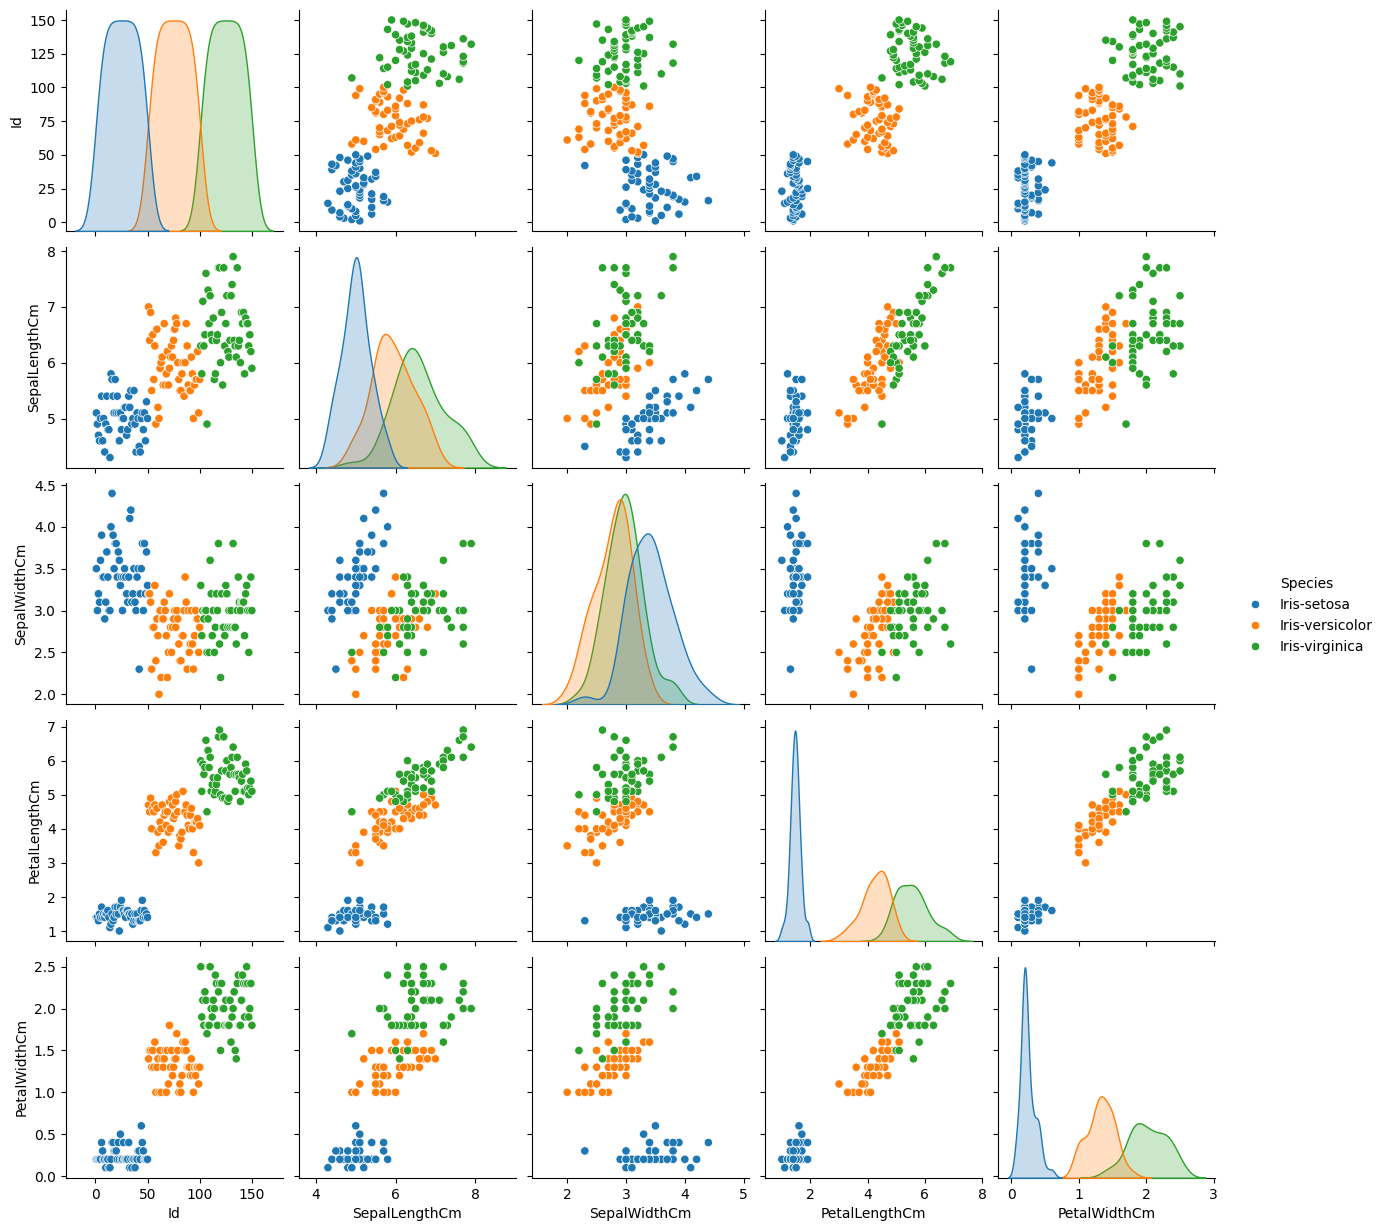

In [3]:
sns.pairplot(df, hue="Species")

plt.show()

- The features `petal length` and `petal width` exhibit good class separability in this dataset

### 2.2 Separating the Data into Train and Test sets

- The target variable requires mapping to integers

In [4]:
X = (
        df
         .drop(columns="Species")
         .iloc[:, -2:]
         .set_axis(["petal_length", "petal_width"], axis=1)
)

X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [5]:
labels = df.Species.unique()
labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
target_mapping = {
    label: val for label, val in zip(labels, range(len(labels)))
}

target_mapping

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [7]:
reverse_mapping = {
    v: k for k, v in target_mapping.items()
}

reverse_mapping

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [8]:
y = (
    df
     .Species
     .map(target_mapping)
     .values
)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=7
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 2) (120,)
(30, 2) (30,)


## 3. Data Preprocessing

- The missing values in the features will be imputed with the `median` values
- The features will be scaled using `standardization`
- These steps will be performed sequentially using Scikit-learn `pipeline`

In [10]:
imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

preprocessor = Pipeline(steps=[
    ("imputer", imputer),
    ("scaler", scaler)
])

preprocessor

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [11]:
X_pre = preprocessor.fit_transform(X_train)

X_pre = pd.DataFrame(
    X_pre,
    columns=X_train.columns,
    index=X_train.index
)

X_pre.head()

,petal_length,petal_width
130,1.302735,0.900644
21,-1.281202,-1.047865
117,1.639770,1.290346
140,1.021872,1.550147
100,1.246562,1.680047


## 4. Implementing the Decision Boundary Visualizer

In [12]:
markers = ["s", "o", "^"]
colors = ["#db0404", "#28a605", "#0412b3"]

columns = X_train.columns
classes = np.unique(y_train)
n_classes = len(classes)

In [13]:
def plot_data():
    """

    Description:
    ------------
    This function will provide the scatter plot of the dataset
    
    """

    for cls, color, marker in zip(classes,
                                  colors[:n_classes],
                                  markers[:n_classes]):
        subset = (y == cls)
        plt.scatter(
            X.values[subset, 0],
            X.values[subset, 1],
            c=color,
            marker=marker,
            edgecolors="black",
            label=reverse_mapping[cls]
        )

    plt.xlabel(columns[0])
    plt.ylabel(columns[1])

    plt.legend(
        loc="upper left",
        bbox_to_anchor=(1.05, 1),
        title="Species",
        title_fontproperties=dict(weight="bold", size=12)
    )

In [20]:
def plot_decision_boundary(clf):
    """

    Description:
    ------------
    This function will plot the decision boundary of any given classifier

    Parameters:
    -----------
    clf: classifier instance
         The classifier to plot the decision boundary for
         
    """
    
    model = Pipeline(steps=[
        ("pre", preprocessor),
        ("clf", clf[1])
    ])

    model.fit(X_train.values, y_train)

    x1_min, x2_min = np.min(X_train, axis=0) - 0.5
    x1_max, x2_max = np.max(X_train, axis=0) + 0.5

    n = 100
    xx, yy = np.meshgrid(
        np.linspace(x1_min, x1_max, n),
        np.linspace(x2_min, x2_max, n)
    )

    X_new = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(X_new).reshape(xx.shape)

    plt.contourf(
        xx,
        yy,
        Z,
        cmap=ListedColormap(colors[:n_classes]),
        alpha=0.5
    )

    plt.contour(
        xx,
        yy,
        Z,
        colors="black",
        linewidths=1
    )

    plt.title(f"Decision Boundary of {clf[0]}")

## 5. Decision Boundary Analysis

In [21]:
classifiers = [
    ("Naive Bayes", GaussianNB()),
    ("Logistic Regression", LogisticRegression()),
    ("Support Vector Machine", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Ada Boost", AdaBoostClassifier()),
    ("XG Boost", XGBClassifier())
]

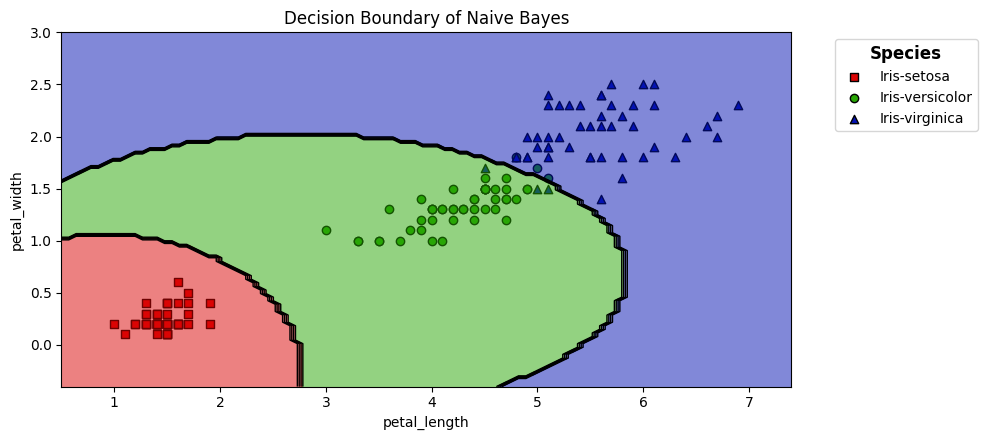

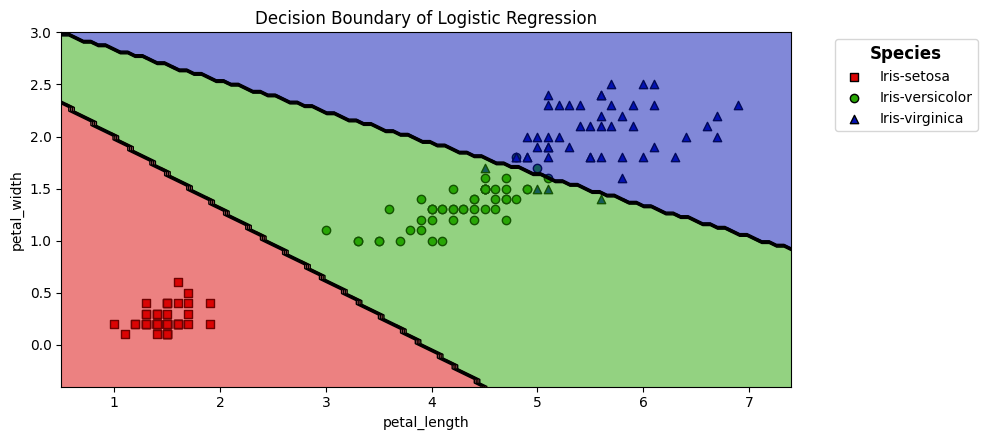

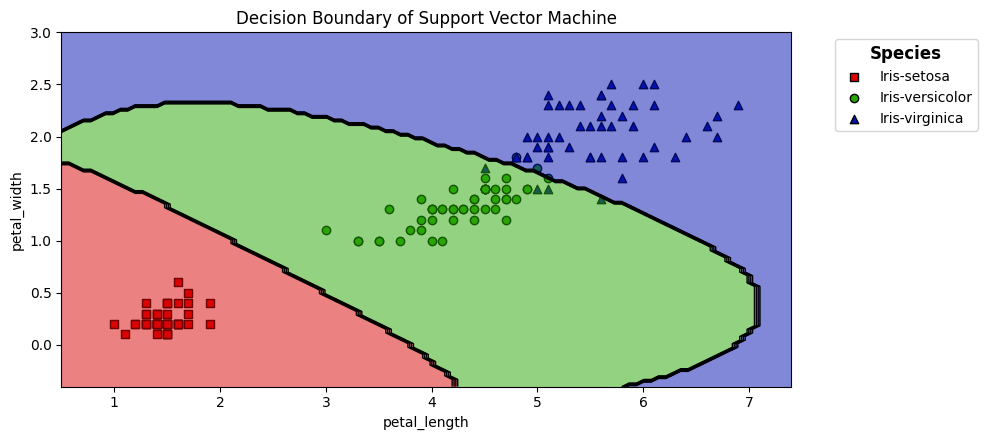

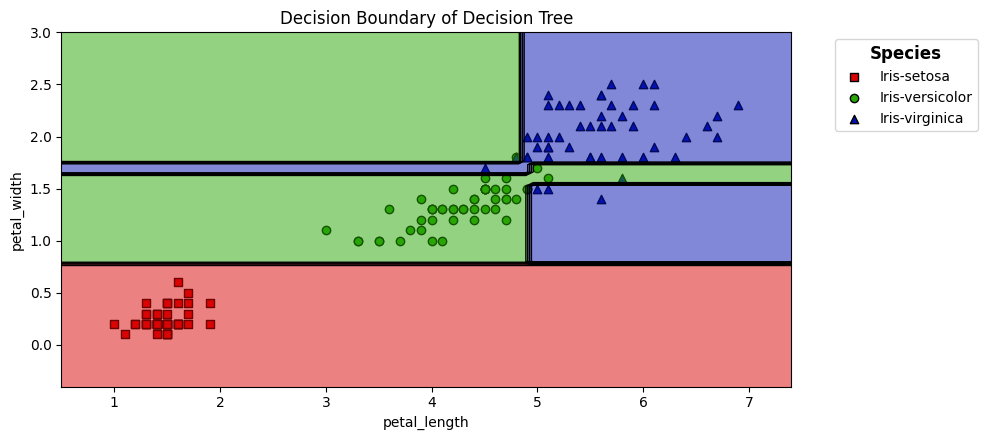

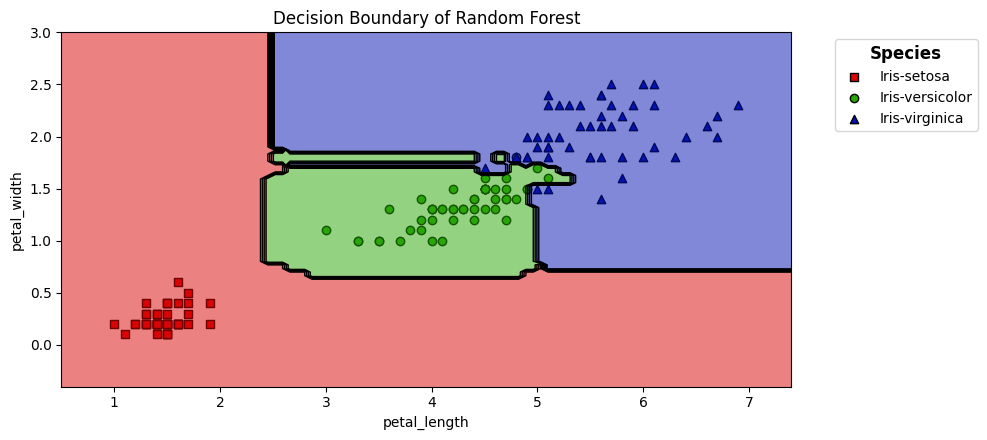

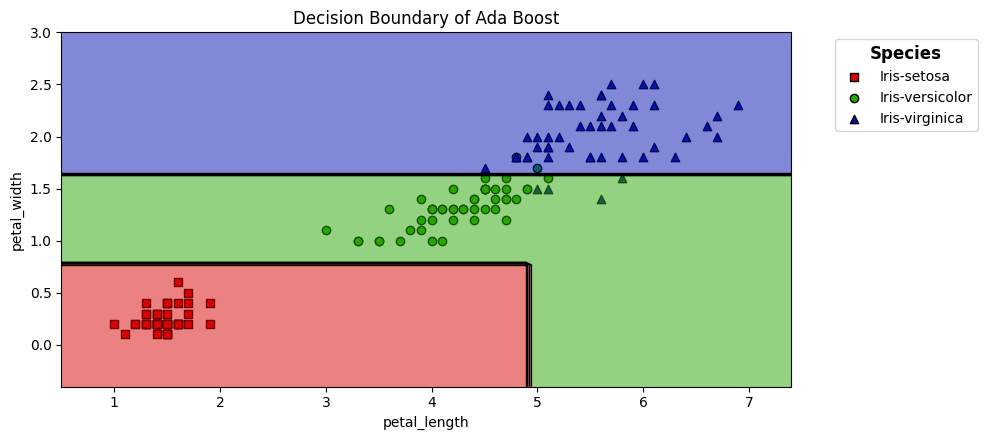

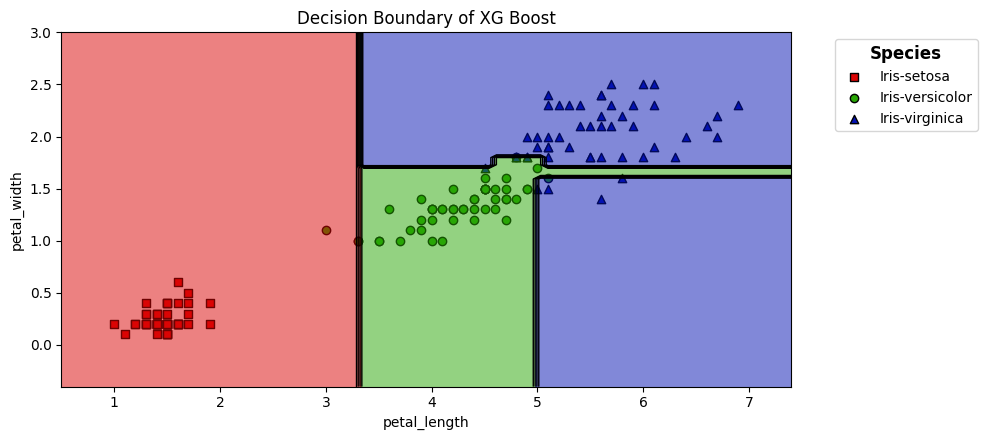

In [22]:
for classifier in classifiers:
    plt.figure(figsize=(10, 4.5))
    plot_data()
    plot_decision_boundary(classifier)
    plt.tight_layout()
    plt.show()

- The above plots display the decision boundaries for various algorithms
- The nature of the black curves represents the complexity of the algorithms
- This function can be used for performing such an analysis for any no. of classification algorithms